In [358]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib import cm
from matplotlib.colors import Normalize

plt.style.use('matplotlib.mplstyle')

DATA_DIR = 'Data/'
data_name = '2M_0.02.txt'

col_names = ['Step','t','M','LogL','LogR',
                 'LogTs','LogTc','Logrhoc','logPc','psic',
                 'Xc','Yc','XCc','XNc','XOc',
                 'taudyn','tauKH','taunuc','Lpp','LCNO',
                 'L3a','LZ','Lv','MHe','MC',
                 'MO','RHe','RC','RO']
    

col_names_structure = ['Mr','r','Lr','P','rho',
                 'T','U','S','Cp','adia1',
                 'nablaad','mu','ne','Pe','Pr',
                 'nablarad','nabla','vc','kappa','epsnuc',
                 'epspp','epscno','eps3alpha','epsvnuc','epsv', 'epsgrav',
                 'X','-','X+','Y', 'Y+', 'Y++', 'XC', 'XN', 'XO', 'Psi']




### 3.1 Radial and temporal dependence of stellar properties

#### Stellar surface and stellar core

C:\Users\amirt\AppData\Local\Temp\ipykernel_35192\264172476.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_dir + data_name, delim_whitespace=True, header=None)


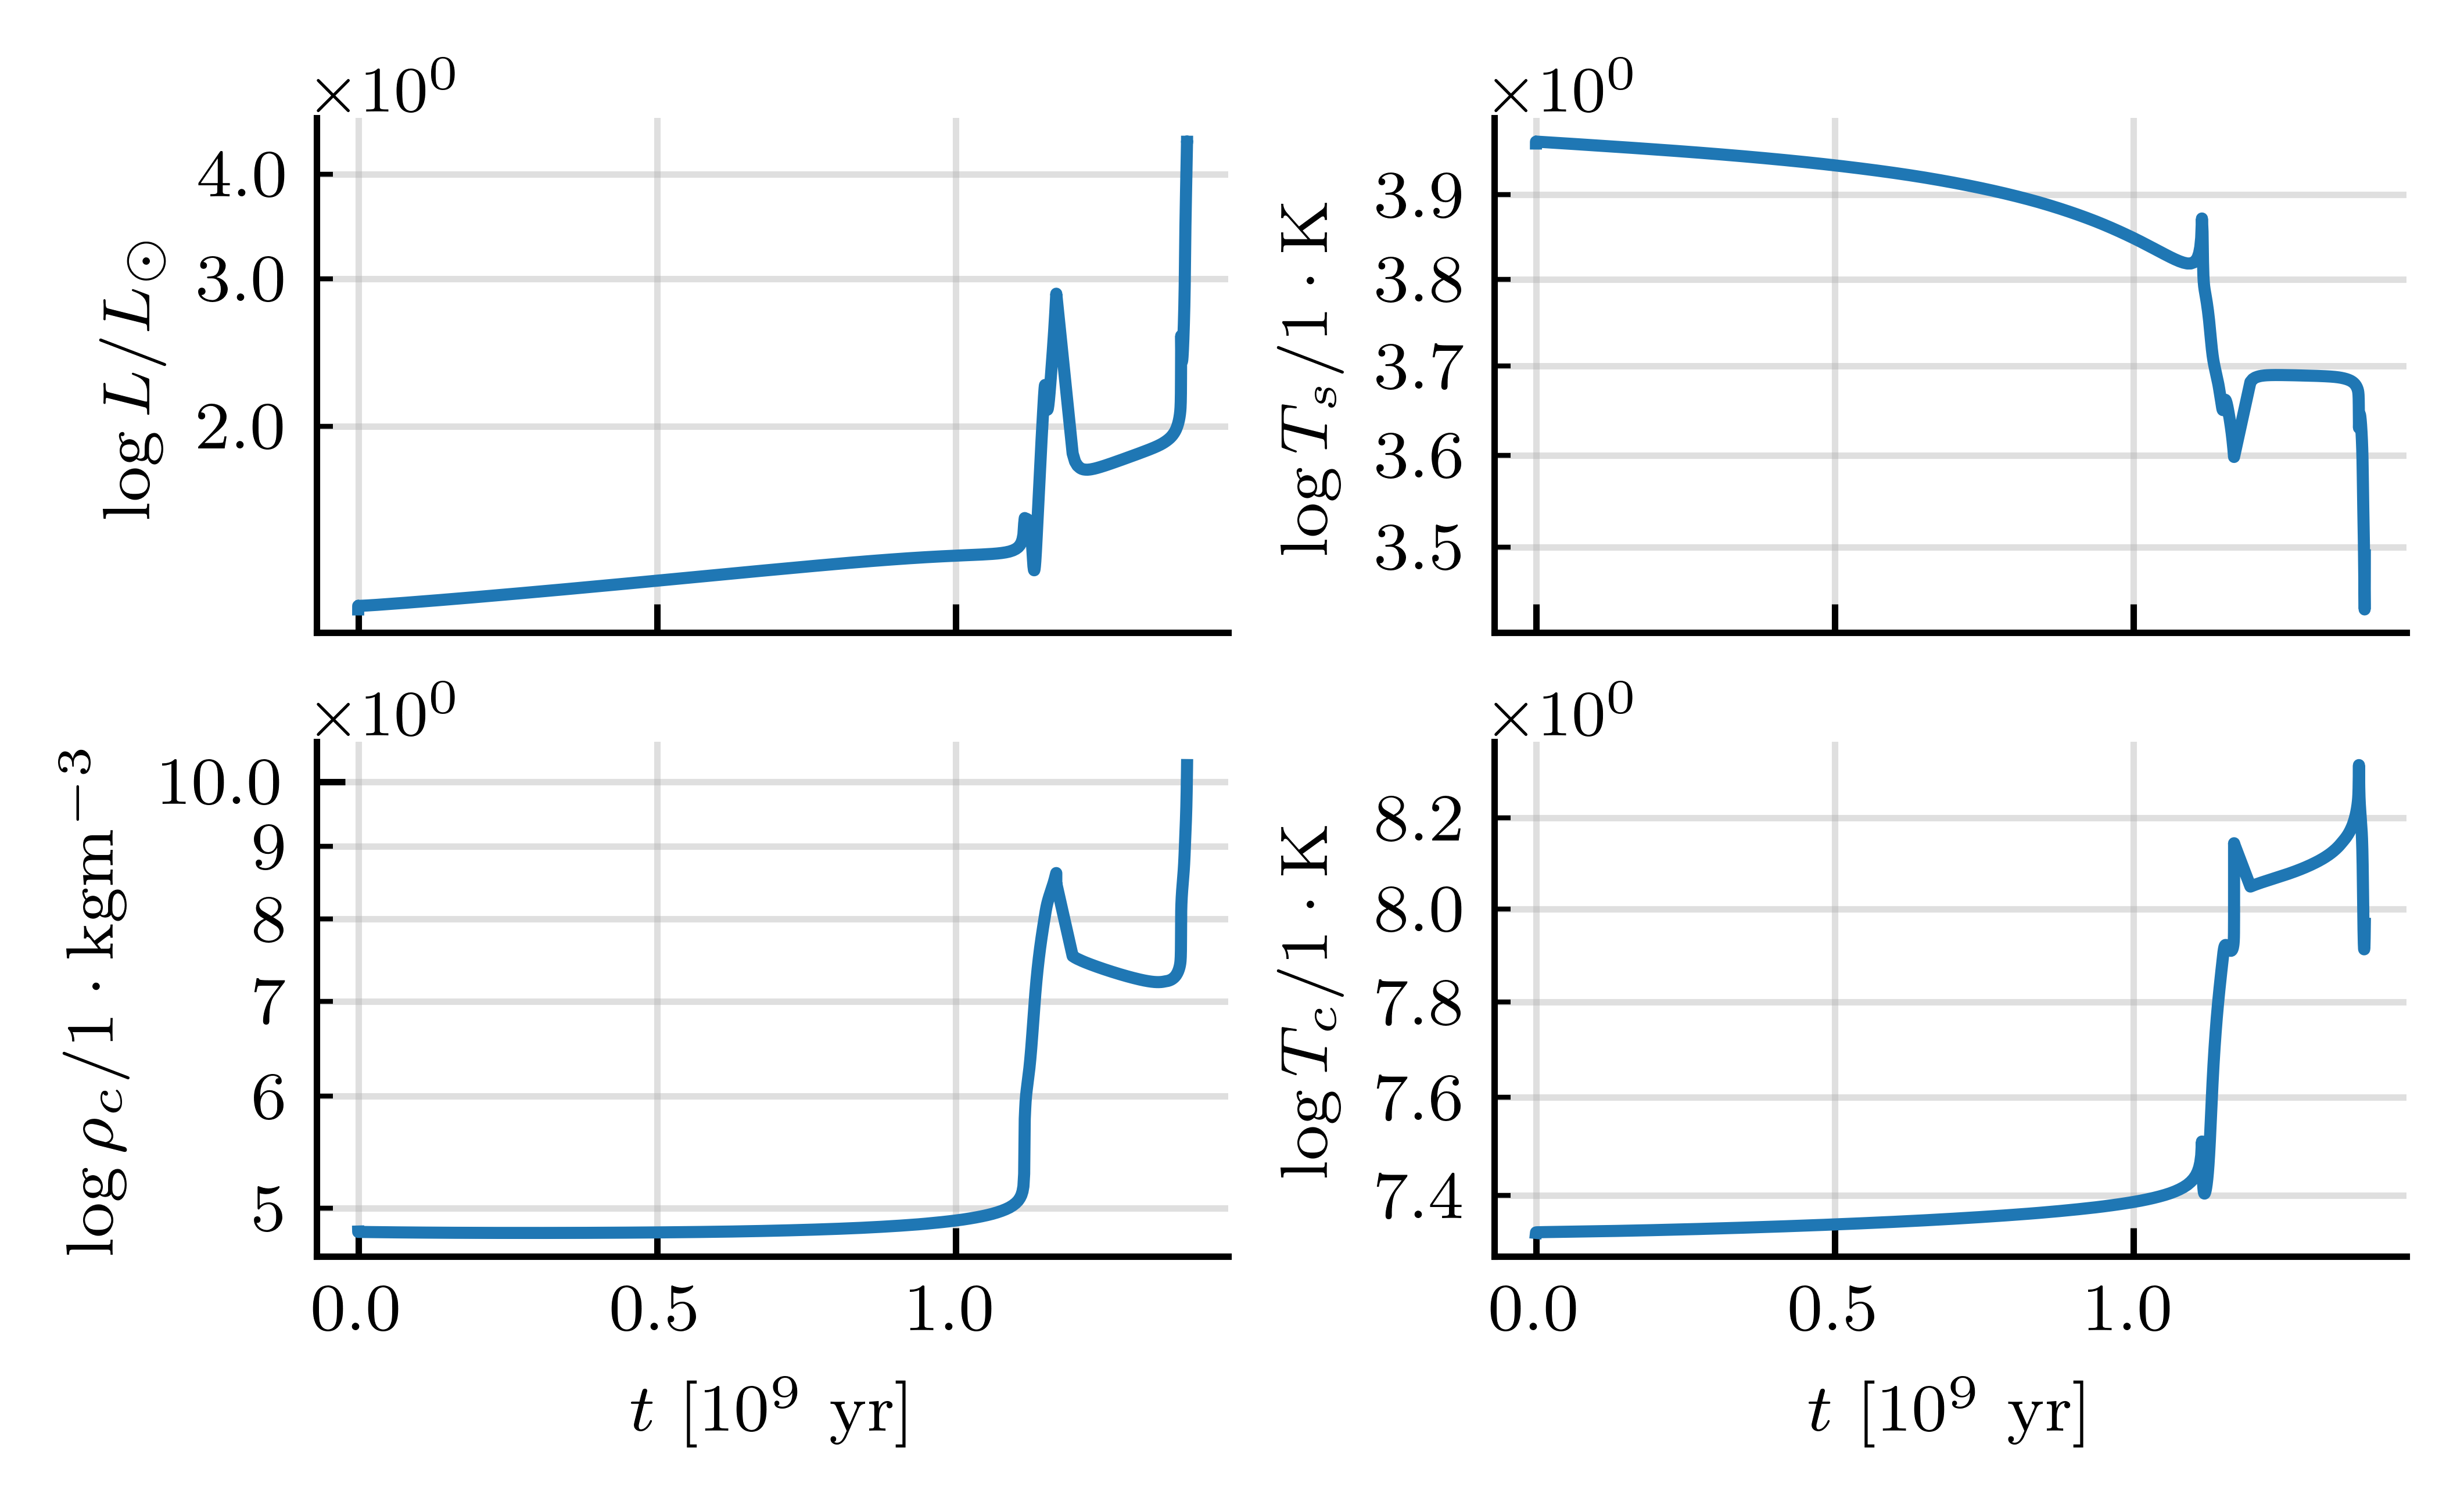

In [359]:
def plot_data(data_files, data_dir='Data/'):

    fig, axs = plt.subplots(2, 2, sharex=True)
        
    for data_name in data_files:
        df = pd.read_csv(data_dir + data_name, delim_whitespace=True, header=None)
        df.columns = col_names
        df.drop(columns=['Step'], inplace=True)

        
        axs[0, 0].semilogy(df['t'] / 1e9, df['LogL'])
        axs[0, 0].set_ylabel(r"$\log L/L_\odot$")
        
        axs[0, 1].semilogy(df['t'] / 1e9, df['LogTs'])
        axs[0, 1].set_ylabel(r"$\log T_s / 1 \cdot \mathrm{K}$")
        
        axs[1, 0].semilogy(df['t'] / 1e9, df['Logrhoc'])
        axs[1, 0].set_xlabel(r"$t \ [\mathrm{10^9 \ yr}]$")
        axs[1, 0].set_ylabel(r"$\log \rho_c / \mathrm{1 \cdot kg m^{-3}}$")
        
        axs[1, 1].semilogy(df['t'] / 1e9, df['LogTc'])
        axs[1, 1].set_xlabel(r"$t \ [\mathrm{10^9 \ yr}]$")
        axs[1, 1].set_ylabel(r"$\log T_c/ 1 \cdot \mathrm{K}$")
        
        for ax in axs.flat:
            ax.yaxis.set_minor_formatter(ScalarFormatter(useMathText=True))
            ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
            ax.text(0.0, 1.0, r'$\times \mathrm{10^{0}}$', transform=ax.transAxes,
                    horizontalalignment='left', verticalalignment='bottom', fontsize=8)
            ax.grid(which='both', alpha=0.4, visible=True)
    plt.show()

data_files = [data_name] 
plot_data(data_files)


### Stellar interior

- Density, temperature, hydrogen mass fraction, luminosity

In [360]:
import os

data_dir = r'c:\Users\amirt\OneDrive - Chalmers\Teknisk fysik\MSc. Physics\M1\Stellar Physics (RRY145)\Project\structure-files'

def format_data_name(data_name):
    parts = data_name.split('_')
    mass_part = parts[0].lower().replace('m', 'msun')
    decimal_part = parts[1].replace('0.', '').replace('.txt', '') 
    new_name = f"{mass_part}_{decimal_part}_SI"
    return new_name

def get_structure_files(data_dir, digits):
    all_files = os.listdir(data_dir)
    structure_files = [f for f in all_files if f.startswith("structure_")]
    
    formatted_digits = [digit.zfill(5) for digit in digits]
    filtered_files = [f for f in structure_files if f[10:15] in formatted_digits]
    
    return sorted(filtered_files)

def get_max_num(data_dir):
    all_files = os.listdir(data_dir)
    structure_files = [f for f in all_files if f.startswith("structure_")]
    time_steps = [int(f[10:15]) for f in structure_files]
    max_time_step = max(time_steps) if time_steps else 0
    
    return max_time_step



['structure_00000.txt', 'structure_00050.txt', 'structure_00496.txt', 'structure_00744.txt', 'structure_00992.txt']
c:\Users\amirt\OneDrive - Chalmers\Teknisk fysik\MSc. Physics\M1\Stellar Physics (RRY145)\Project\structure-files\2msun_02_SI structure_00000.txt
c:\Users\amirt\OneDrive - Chalmers\Teknisk fysik\MSc. Physics\M1\Stellar Physics (RRY145)\Project\structure-files\2msun_02_SI structure_00050.txt
c:\Users\amirt\OneDrive - Chalmers\Teknisk fysik\MSc. Physics\M1\Stellar Physics (RRY145)\Project\structure-files\2msun_02_SI structure_00496.txt
c:\Users\amirt\OneDrive - Chalmers\Teknisk fysik\MSc. Physics\M1\Stellar Physics (RRY145)\Project\structure-files\2msun_02_SI structure_00744.txt
c:\Users\amirt\OneDrive - Chalmers\Teknisk fysik\MSc. Physics\M1\Stellar Physics (RRY145)\Project\structure-files\2msun_02_SI structure_00992.txt


C:\Users\amirt\AppData\Local\Temp\ipykernel_35192\262866188.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)
C:\Users\amirt\AppData\Local\Temp\ipykernel_35192\262866188.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)
C:\Users\amirt\AppData\Local\Temp\ipykernel_35192\262866188.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)
C:\Users\amirt\AppData\Local\Temp\ipykernel_35192\262866188.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future v

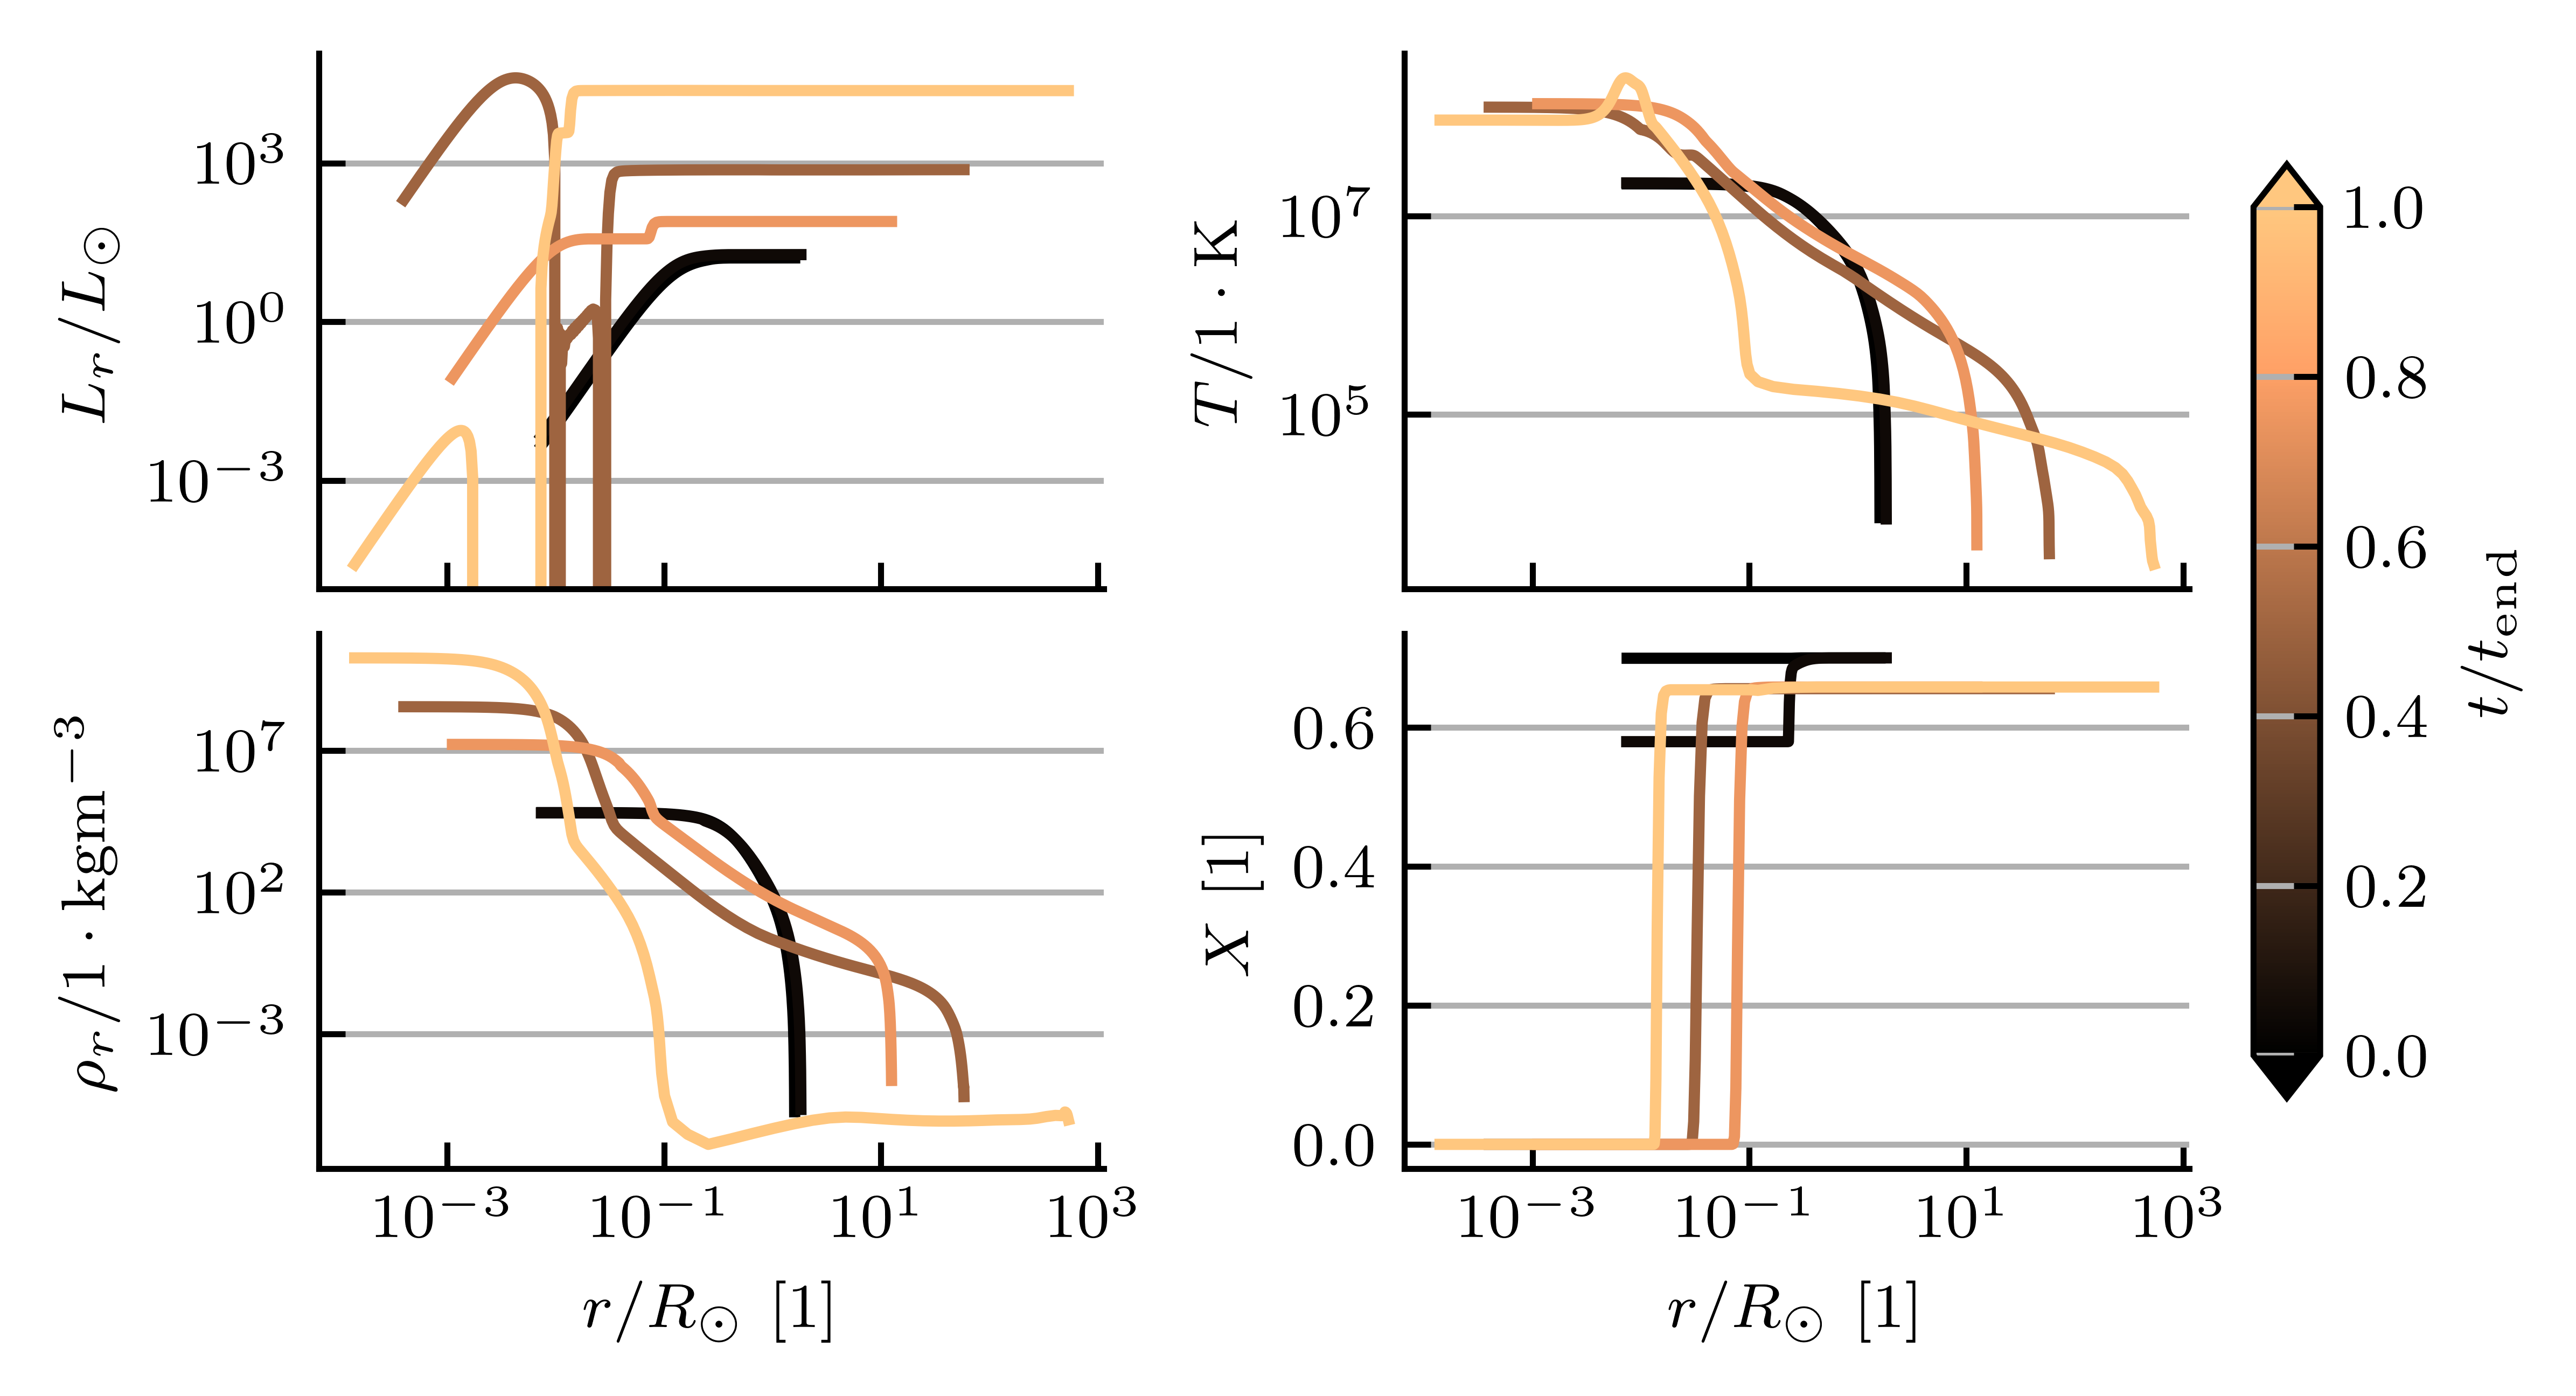

In [361]:
def plot_data(data_files, data_dir, max_iter):

    
    fig, axs = plt.subplots(2, 2, sharex=True)
    cmap = cm.copper
    norm = Normalize(vmin=0, vmax=1)
    
    print(data_files)
    for data_name in data_files:
        
        print(data_dir, data_name)
        file_path = os.path.join(data_dir, data_name)
        
        df = pd.read_csv(file_path, delim_whitespace=True, header=None)
        df.columns = col_names_structure
        
        r = df['r']
        
        time_percentage = int(data_name[10:15])/max_iter 
        color = cmap(norm(time_percentage)) 
        
        axs[0, 0].loglog(r, df['Lr'], color = color)
        axs[0, 0].set_ylabel(r"$L_r/L_\odot$")
        
        axs[0, 1].loglog(r, df['T'], color = color)
        axs[0, 1].set_ylabel(r"$T / 1 \cdot \mathrm{K}$")
        
        axs[1, 0].loglog(r, df['rho'], color = color)
        axs[1, 0].set_xlabel(r"$r/R_\odot$ [1]")
        axs[1, 0].set_ylabel(r"$\rho_r / \mathrm{1 \cdot kg m^{-3}}$")
        
        axs[1, 1].semilogx(r, df['X'], color = color)
        axs[1, 1].set_xlabel(r"$r/R_\odot$ [1]")
        axs[1, 1].set_ylabel(r"$X$ [1]")
        
        
    
    cbar_ax = fig.add_axes([1., 0.2, 0.03, 0.7])  
    cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, extend = "both", aspect = 0.8)
    cbar.set_label(r'$t/t_\mathrm{end}$')

    
    plt.savefig("2M_interior.pdf")
    plt.show()
        
res = format_data_name(data_name)
full_path = os.path.join(data_dir, res)
max_iter = get_max_num(full_path)

input_digits = [str(int(x)).zfill(5) for x in [0, 50, max_iter//2,  3*max_iter//4,  max_iter]]
data_files = get_structure_files(full_path, input_digits)
plot_data(data_files, full_path, max_iter)



#### 3D plotting

C:\Users\amirt\AppData\Local\Temp\ipykernel_35192\3797095508.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)
C:\Users\amirt\AppData\Local\Temp\ipykernel_35192\3797095508.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)
C:\Users\amirt\AppData\Local\Temp\ipykernel_35192\3797095508.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)
C:\Users\amirt\AppData\Local\Temp\ipykernel_35192\3797095508.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a futu

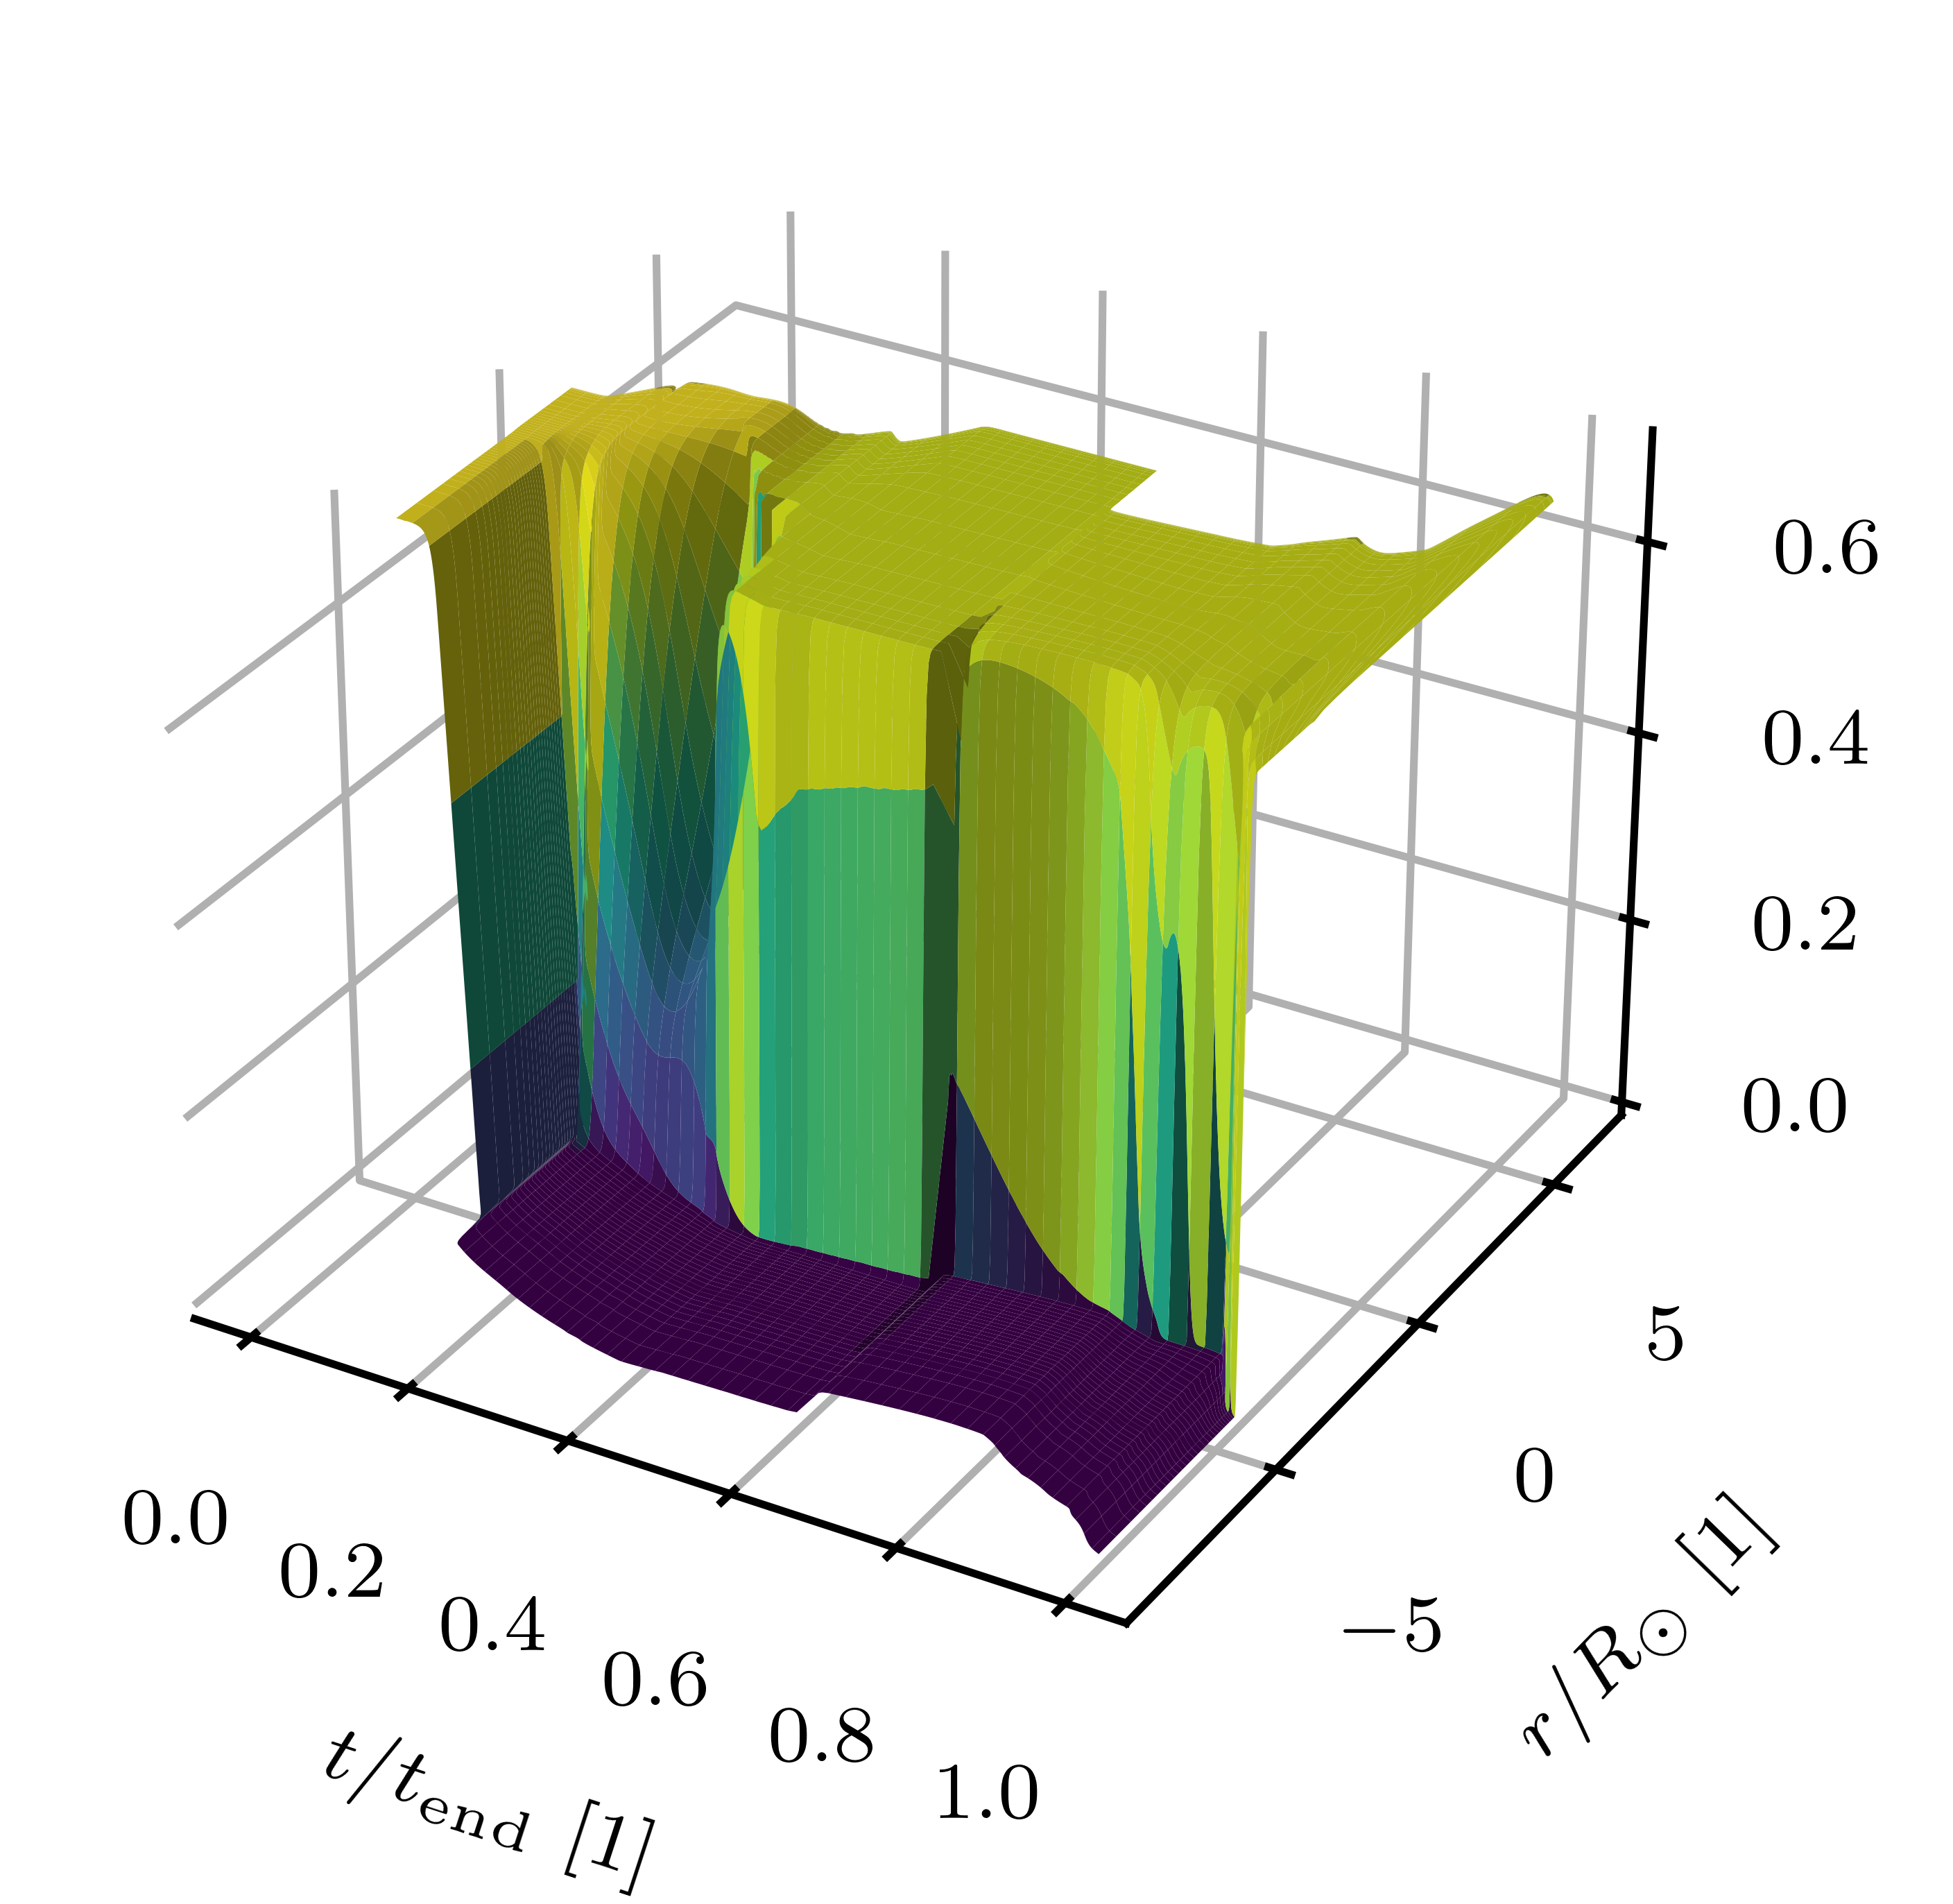

In [362]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D


def plot_3D(data_files, data_dir, max_iter, variable):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    r_all = []    
    time_all = []    
    variable_all = []

    cmap = cm.viridis
    norm = Normalize(vmin=0, vmax=1)

    for idx, data_name in enumerate(data_files):
        file_path = os.path.join(data_dir, data_name)
        
        df = pd.read_csv(file_path, delim_whitespace=True, header=None)
        df.columns = col_names_structure
        
        r = df['r']
        var_values = df[variable]
        
        time_percentage = idx / max_iter  

        r_all.append(r)
        time_all.append([time_percentage] * len(r))  
        variable_all.append(var_values)

    r_all = np.concatenate(r_all)        
    time_all = np.concatenate(time_all)  
    variable_all = np.concatenate(variable_all)  
    
    r_reshaped = r_all.reshape(len(data_files), -1)
    time_reshaped = np.array(time_all).reshape(len(data_files), -1)
    variable_reshaped = np.array(variable_all).reshape(len(data_files), -1)
    

    norm_variable = Normalize(vmin=0, vmax=np.max(variable_reshaped))
    colors = cmap(norm_variable(variable_reshaped))
    surface = ax.plot_surface(time_reshaped, np.log(r_reshaped), variable_reshaped, edgecolor='none', facecolors=colors)
    ax.set_xlabel(r'$t/t_\mathrm{end}$ [1]')
    ax.set_ylabel(r'$r/R_\odot$ [1]')
    #ax.set_zlabel(f'$L_r/L_\odot$ [1]')
    
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    plt.show()

input_digits = [str(int(x)).zfill(5) for x in np.linspace(0, max_iter, max_iter, dtype = int)]
data_files = get_structure_files(full_path, input_digits)
plot_3D(data_files, full_path, max_iter, 'X')
